In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

tqdm.pandas()

%matplotlib inline

SEED = 42

NUM_FEATURES = 5000
NUM_CLASSES = 3993

features = pd.read_csv("../data/expanded/train_features.csv", names=range(NUM_FEATURES))
labels = pd.read_csv("../data/expanded/train_labels.csv", names=range(NUM_CLASSES))

C:\Users\Andrew\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [8]:
labels_svd = np.linalg.svd(labels)

In [37]:
labels_cov = np.cov(labels, rowvar = False)

In [50]:
labels_corr = np.corrcoef(labels, rowvar = False)

In [10]:
singular_values = labels_svd[1]
total_variance = np.sum(singular_values)
explained_variance = np.cumsum(np.flip(singular_values))

In [101]:
singular_values

array([4.13904952e+01, 3.62947771e+01, 3.40874429e+01, ...,
       4.34809377e-16, 3.82911924e-16, 2.67249626e-16])

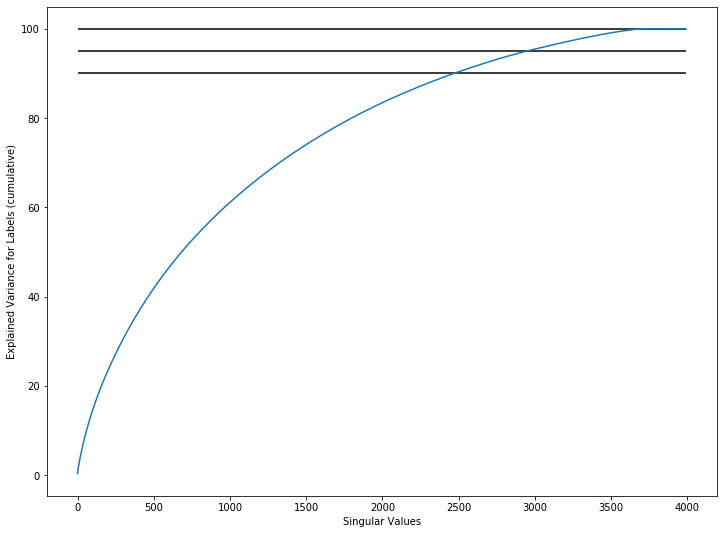

In [102]:
singular_values = labels_svd[1]
total_variance = np.sum(singular_values)
explained_variance = np.cumsum(singular_values)/total_variance

plt.figure(figsize=(12, 9))
plt.plot(explained_variance * 100)
plt.hlines([90, 95, 100], 0, len(singular_values))
plt.xlabel("Singular Values")
plt.ylabel("Explained Variance for Labels (cumulative)")
plt.show()

In [52]:
labels_corr.shape

(3993, 3993)

In [63]:
# There are labels that never show up, making some correlation coefficients equal to 0.
np.min(np.sum(labels, axis = 0))

0.0

In [85]:
labels_corr_cleaned = np.nan_to_num(labels_corr, copy = True)

In [87]:
np.fill_diagonal(labels_corr_cleaned, 0)

In [95]:
np.sum(np.abs(labels_corr_cleaned) > 0.9)

134